In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from src.dynadojo.systems.lorenz import LorenzSystem
from src.dynadojo.systems.lds import LDSystem
from src.dynadojo.utils.lds import plot
from src.dynadojo.baselines.sindy import SINDy
import numpy as np

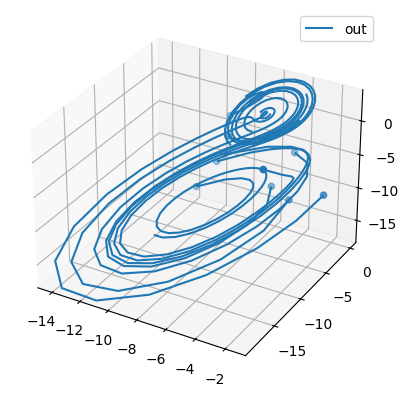

In [ ]:
latent_dim = 3
embed_dim = latent_dim
n = 50
test_size = 10
timesteps = 50
system = LorenzSystem(latent_dim, embed_dim, noise_scale=0)
x0 = system.make_init_conds(n)
y0 = system.make_init_conds(30, in_dist=False)
x = system.make_data(x0, control=np.zeros((n, timesteps, embed_dim)), timesteps=timesteps)
y = system.make_data(y0, control=np.zeros((test_size, timesteps, embed_dim)), timesteps=timesteps, noisy=True)
fig , ax = plot([x, y], target_dim=min(latent_dim, 3), labels=["train", "truth"], max_lines=test_size) #test data is ood

y_err=3.793999545813273


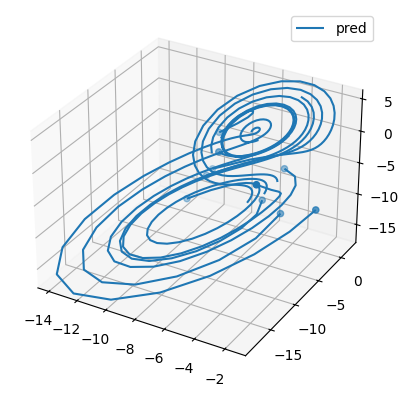

In [ ]:
sindy = SINDy(embed_dim, timesteps, max_control_cost=0, seed=100)
sindy.fit(x)
y_pred = sindy.predict(y[:, 0], timesteps)
ax = None
fig, ax = plot([y_pred, y], target_dim=min(3, latent_dim),\
     labels=["pred", "truth"], max_lines=15, ax=ax)
y_err = system.calc_error(y, y_pred)
print(f"{y_err=}")
fig.savefig("sindy_lorenz.pdf", bbox_inches="tight", dpi=600)

In [ ]:
latent_dim = 3
embed_dim = latent_dim
n = 50
test_size = 10
timesteps = 50
system = LDSystem(latent_dim, embed_dim, seed=122)
x0 = system.make_init_conds(n)
y0 = system.make_init_conds(30, in_dist=False)
x = system.make_data(x0, control=np.zeros((n, timesteps, embed_dim)), timesteps=timesteps)
y = system.make_data(y0, control=np.zeros((test_size, timesteps, embed_dim)), timesteps=timesteps, noisy=True)
fig , ax = plot([x, y], target_dim=min(latent_dim, 2), labels=["in", "out"], max_lines=test_size)
# fig , ax = plot([y], target_dim=min(latent_dim, 3), labels=["out"], max_lines=test_size)

ValueError: Dimension of rotation must be specified,and must be a scalar greater than 1.

y_err=0.0005003808983469885


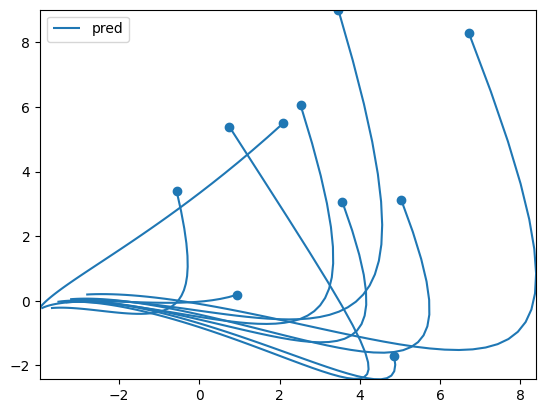

In [ ]:
sindy = SINDy(embed_dim, timesteps, max_control_cost=0, seed=None)
sindy.fit(x)
y_pred = sindy.predict(y[:, 0], timesteps)
ax = None
fig, ax = plot([y_pred], target_dim=min(2, latent_dim), labels=["pred"], max_lines=15, ax=ax)
y_err = system.calc_error(y, y_pred)
print(f"{y_err=}")

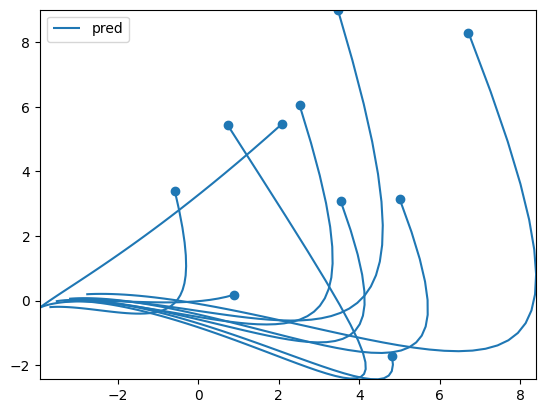

In [98]:
fig